#  <center> Pyoecto 1 TAA </center>
##  <center> Higgs Boson  </center>

## Parte 1 - Primer acercamiento a los datos del primer proyecto.  


In [1]:
import numpy as np
import pandas as pd

In [2]:
from pre_processing import map_s_and_b_values, get_target, change_999values_to_NaN, drop_unused_columns, change_Nan_values_by_the_mean

In [3]:
data_training = pd.read_csv('../../data/input/training.csv')

In [4]:
data_training.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [5]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

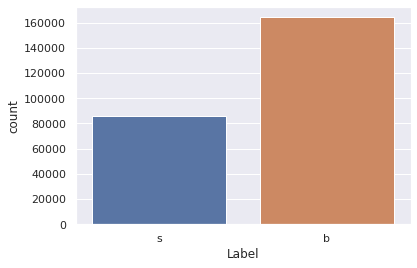

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
labels_count = sns.countplot(x="Label", data=data_training)
fig = labels_count.get_figure()
# fig.savefig("sns-heatmap.png")

In [5]:
data_training = map_s_and_b_values(data_training)

#### Objetivos:

 - Cree una función que descargue y levante los datos del proyecto. Automatizar el proceso de obtención de datos es útil si se necesita instalar el conjunto de datos en varias máquinas. También, es particularmente útil si los datos cambian regularmente.
 - Identificar el atributo a predecir ¿Es un problema de clases desbalanceadas? 
 - Convertir las etiquetas a predecir a variables numéricas, en particular 0 para la clase *background* y 1 para la clase *signal*. Este proceso le permitirá posteriormente entrenar algún modelo de clasificación sin problemas.
 - Identificar si hay datos faltantes. ¿En caso de ser así cuántos datos faltantes hay en cada característica? *Observación: No necesariamente los datos faltantes se presentan como NaN [Ver Documentación del Proyecto](https://www.kaggle.com/c/higgs-boson/data)*
 - Estudiar la correlación entre las características y la etiqueta a predecir. *Observar que si los datos faltantes no aparecen como NaN afectarán el estudio de la correlación.*
 - Calcular el valor esperado de *signals* y *backgrounds* en un año. Para obtener este resultado será necesario entender el significado de la característica 'Weights' para ello sugerimos leer la [Documentación Técnica del Proyecto.](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf) 

### - Identificar el atributo a predecir ¿Es un problema de clases desbalanceadas? 
- Atributo a predecir: "Label"

In [6]:
background = len(data_training[data_training.Label == 0])
signal = len(data_training[data_training.Label == 1])

print('qty background = ',background)
print('qty signal = ',signal)

qty background =  164333
qty signal =  85667


## - Identificar si hay datos faltantes. ¿En caso de ser así cuántos datos faltantes hay en cada característica? 

In [7]:
from tabulate import tabulate

nan_values = []
for col in data_training.columns:
  qty_nan_values = len(data_training[data_training[col]== -999.0])
  nan_values.append([col, qty_nan_values])

col_names = ["Column name", "Qty nan values"]
print(tabulate(nan_values, headers=col_names))

Column name                    Qty nan values
---------------------------  ----------------
EventId                                     0
DER_mass_MMC                            38114
DER_mass_transverse_met_lep                 0
DER_mass_vis                                0
DER_pt_h                                    0
DER_deltaeta_jet_jet                   177457
DER_mass_jet_jet                       177457
DER_prodeta_jet_jet                    177457
DER_deltar_tau_lep                          0
DER_pt_tot                                  0
DER_sum_pt                                  0
DER_pt_ratio_lep_tau                        0
DER_met_phi_centrality                      0
DER_lep_eta_centrality                 177457
PRI_tau_pt                                  0
PRI_tau_eta                                 0
PRI_tau_phi                                 0
PRI_lep_pt                                  0
PRI_lep_eta                                 0
PRI_lep_phi                       

## - Estudiar la correlación entre las características y la etiqueta a predecir. *Observar que si los datos faltantes no aparecen como NaN afectarán el estudio de la correlación.*
- Change -999.0 values to NaN



In [8]:
data_training = change_999values_to_NaN(data_training)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

corr_matrix = data_training.corr()
corr_matrix['Label'].sort_values(ascending = False)

Label                          1.000000
DER_deltaeta_jet_jet           0.328305
DER_mass_jet_jet               0.316727
DER_lep_eta_centrality         0.308082
DER_met_phi_centrality         0.271752
PRI_tau_pt                     0.235238
DER_pt_h                       0.192526
DER_sum_pt                     0.153236
PRI_met_sumet                  0.135520
PRI_jet_all_pt                 0.134296
PRI_jet_num                    0.133549
PRI_jet_leading_pt             0.109426
PRI_met                        0.022466
DER_deltar_tau_lep             0.012245
DER_mass_MMC                   0.011615
PRI_met_phi                    0.007475
PRI_lep_phi                    0.004125
EventId                        0.002248
PRI_lep_eta                    0.001516
PRI_jet_subleading_eta         0.001205
PRI_jet_leading_eta            0.000308
PRI_jet_leading_phi           -0.000221
PRI_tau_eta                   -0.000943
PRI_tau_phi                   -0.004403
PRI_jet_subleading_phi        -0.006294


## - Calcular el valor esperado de *signals* y *backgrounds* en un año.


In [10]:
print(data_training.loc[(data_training['Label'] == 1)].Weight.sum())
print(data_training.loc[(data_training['Label'] == 0)].Weight.sum())

0.008077656597202568
2.5010183427665855


## Parte 3 -  Un primer pipeline

#### Objetivos:

 - Probar clasificar los datos del proyecto con los distintos métodos vistos en este taller (Árboles de Decisión, Random Forest, XGBoost).**texto en negrita**

## Parte 2 -  Un primer pipeline

- *Datos Faltantes*: ¿Qué estrategia utilizaría para tratar con los datos faltantes?¿Sería la misma para todas las características?


- *Weights*: Habiendo calculado el valor esperado de signals y backgrounds en un año. ¿Cómo debería verse reflejado este resultado al dividir en subconjuntos de entrenamiento y validación? ¿Qué consecuencias puede tener sobre el desempeño no considerarlo?


- *Correlación*: ¿Qué conclusiones extrae de las correlaciones de las características con la etiqueta?¿Existe una diferencia notoria entre la correlación de las características Primitivas y Derivadas?¿A qué se puede deber?¿Considera que puede descartar alguna característica en base a esto?

#### Objetivos:

 - Construir un **pipeline** de preprocesamineto que:
      1. Limpie y pre-procese los datos.
      2. Maneje datos faltantes.
      
      
  - Realice una clasificación de los mismos y evalúe su desempeño utilizando la métrica de evaluación AMS.

Eliminar:

1.   DER_mass_MMC
2.   PRI_jet_leading_pt
3.   PRI_jet_leading_eta
4.   PRI_jet_leading_phi
5.   PRI_jet_subleading_pt
6.   PRI_jet_subleading_eta
7.   PRI_jet_subleading_phi






*   No eliminamos las entradas con datos faltantes, por que son demasiadas y nos quedaríamos con un data set muy chico.
*   Si eliminamos las columnas con datos faltantes y baja (<= 0.10) correlacion con la columna Lable.
*   En las restantes columnas con datos faltantes completamos con el promedio de dicha columna. No completamos con la mediana por que no contienen outliers y no completamos con el dato más frecuente por que al ser floats el dato más frecuente no es un fiel representante de la mayoria.

 - Construir un **pipeline** de preprocesamineto que:
      1. Limpie y pre-procese los datos.
      2. Maneje datos faltantes.

In [11]:
# Preprocesado a los datos de train
y_train = get_target(data_training)
data_training = drop_unused_columns(data_training)
X_train = change_Nan_values_by_the_mean(data_training)